In [1]:
#  Step 1: Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

sns.set(style="whitegrid")


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

sns.set(style="whitegrid")


In [3]:

df = sns.load_dataset('titanic')
df.head()
# 📥 Step 2: Load Dataset
df = sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:

numeric_df = df.select_dtypes(include=['number'])

# Create a summary statistics DataFrame
summary_stats = pd.DataFrame()
summary_stats['mean'] = numeric_df.mean()
summary_stats['median'] = numeric_df.median()
summary_stats['min'] = numeric_df.min()
summary_stats['max'] = numeric_df.max()
summary_stats['variance'] = numeric_df.var()
summary_stats['std_dev'] = numeric_df.std()
summary_stats['25%'] = numeric_df.quantile(0.25)
summary_stats['75%'] = numeric_df.quantile(0.75)

# Display the summary
print(summary_stats)

                          mean    median   min       max      variance  \
survived              0.383838    0.0000  0.00    1.0000      0.236772   
pclass                2.308642    3.0000  1.00    3.0000      0.699015   
age                  29.361582   28.0000  0.42   80.0000    169.512498   
sibsp                 0.523008    0.0000  0.00    8.0000      1.216043   
parch                 0.381594    0.0000  0.00    6.0000      0.649728   
fare                 32.204208   14.4542  0.00  512.3292   2469.436846   
passenger_id        445.000000  445.0000  0.00  890.0000  66231.000000   
has_family_onboard    0.493827    0.0000  0.00    1.0000      0.250243   

                       std_dev       25%    75%  
survived              0.486592    0.0000    1.0  
pclass                0.836071    2.0000    3.0  
age                  13.019697   22.0000   35.0  
sibsp                 1.102743    0.0000    1.0  
parch                 0.806057    0.0000    0.0  
fare                 49.693429   

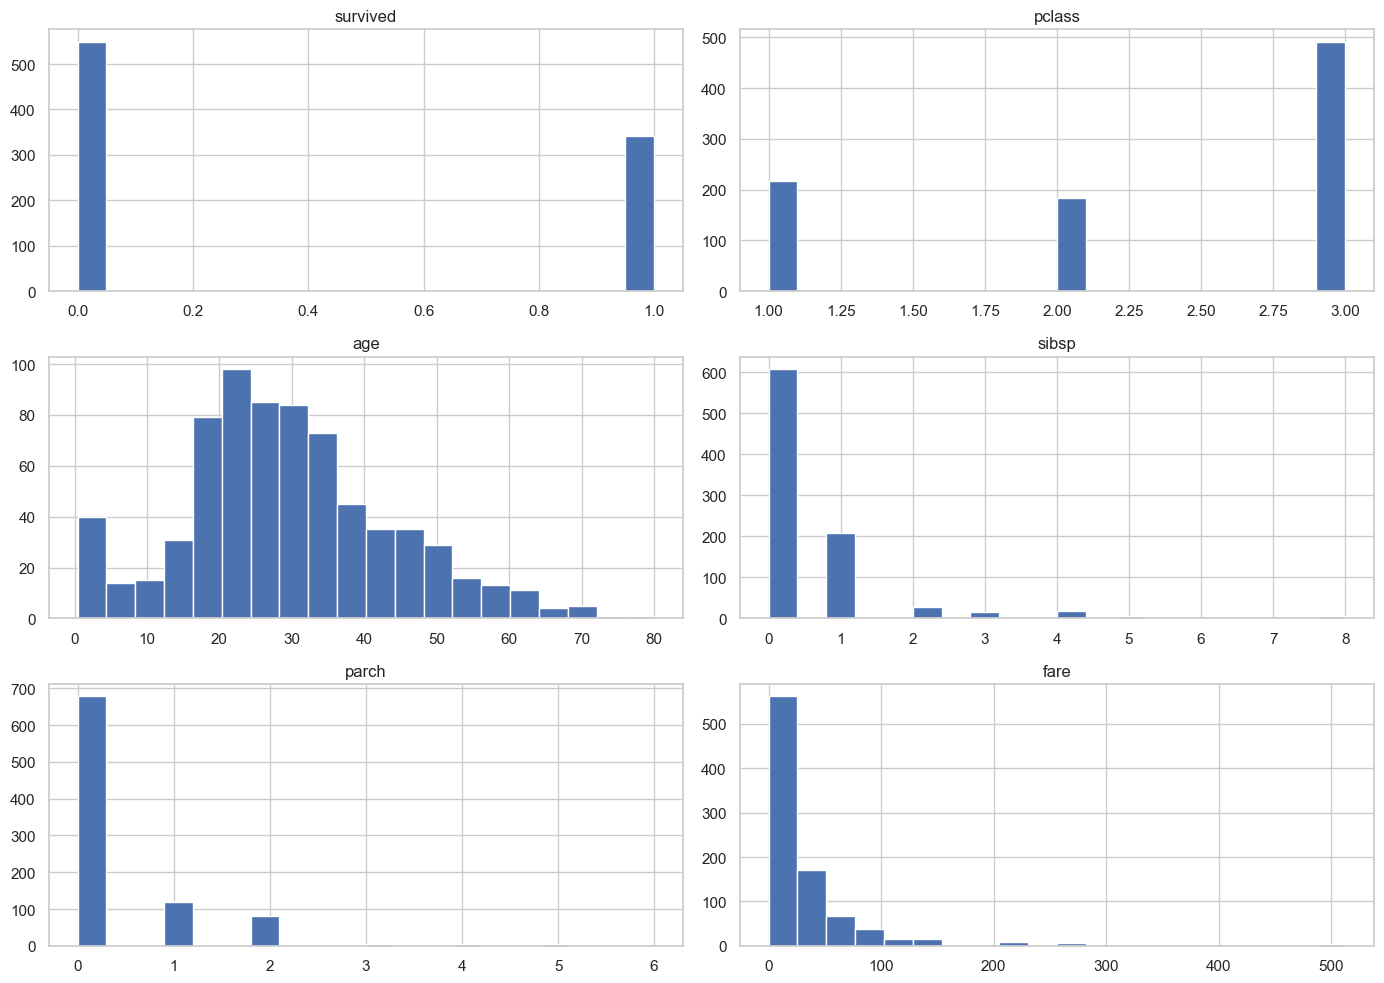

In [5]:

df.hist(figsize=(14, 10), bins=20)
plt.tight_layout()
plt.show()


In [6]:

print("Missing values before:")
print(df.isnull().sum())

# Drop columns with too many missing values or irrelevant info
df.drop(columns=['deck', 'embark_town', 'alive'], inplace=True)

# Fill missing values
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Drop remaining rows with missing values
df.dropna(inplace=True)

print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values before:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Missing values after cleaning:
survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64


C:\Users\SWARAJ PAWAR\AppData\Local\Temp\ipykernel_22972\3484034826.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\SWARAJ PAWAR\AppData\Local\Temp\ipykernel_22972\3484034826.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [7]:

# Simulated dataset: family info
family_data = pd.DataFrame({
    'passenger_id': df.index[:len(df)],
    'has_family_onboard': np.random.choice([0, 1], size=len(df))
})

# Reset index and merge
df = df.reset_index(drop=True)
df = pd.concat([df, family_data], axis=1)
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone,passenger_id,has_family_onboard
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False,0,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False,1,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,True,2,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,False,3,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,True,4,0


In [ ]:

# Encode categorical features
label_cols = ['sex', 'embarked', 'class', 'who', 'embark_town']
df_encoded = df.copy()

le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Drop 'name', 'adult_male', and 'alone' (non-numeric/duplicate info)
df_encoded.drop(columns=['embarked', 'embark_town', 'who', 'adult_male', 'alone'], inplace=True)

# Normalize numeric features
scaler = StandardScaler()
numeric_cols = ['age', 'fare', 'sibsp', 'parch']
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

df_encoded.head()


In [13]:

# Features and label
X = df_encoded.drop(columns=['survived'])
y = df_encoded['survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Results
print("🔍 Classification Report:\n", classification_report(y_test, y_pred))
print("📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       105
           1       0.77      0.68      0.72        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

📉 Confusion Matrix:
 [[90 15]
 [24 50]]


C:\Program Files\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
